In [9]:
from tqdm import tqdm
from keras_tqdm import TQDMNotebookCallback
from tqdm.keras import TqdmCallback
from libs.feature_extraction.vectorizers import BertVectorizer
import pandas as pd
import numpy as np
import scipy 
from sklearn.model_selection import train_test_split
from annoy import AnnoyIndex
import tensorflow as tf

test_index = "1"

In [2]:
test_df = pd.read_csv('./train-test-data/fold'+test_index+'/test_data.csv')

test_df['bert_vector'] = np.load('./train-test-data/fold'+test_index+'/bert_test_vectors.npy').tolist()
test_df['bow_vector'] = np.load('./train-test-data/fold'+test_index+'/bow_test_vectors.npy', allow_pickle=True).tolist()
test_df['d2v_vector'] = np.load('./train-test-data/fold'+test_index+'/d2v_test_vectors.npy').tolist()
test_df['tfidf_vector'] = np.load('./train-test-data/fold'+test_index+'/tfidf_test_vectors.npy', allow_pickle=True).tolist()
test_df['w2v_vector'] = np.load('./train-test-data/fold'+test_index+'/w2v_test_vectors.npy').tolist()

train_data, test_data = train_test_split(test_df, test_size=0.30, random_state=42)
display(train_data.head())

bert_x_train = np.array([np.array(xi) for xi in train_data['bert_vector']])
bert_x_test = np.array([np.array(xi) for xi in test_data['bert_vector']])

bow_x_train = np.array([np.pad(np.array(xi, dtype='uint8'), (0,376565-len(xi))) for xi in train_data['bow_vector']])
bow_x_test = np.array([np.pad(np.array(xi, dtype='uint8'), (0,376565-len(xi))) for xi in test_data['bow_vector']])

d2v_x_train = np.array([np.array(xi) for xi in train_data['d2v_vector']])
d2v_x_test = np.array([np.array(xi) for xi in test_data['d2v_vector']])

tfidf_x_train = np.array([np.pad(np.array(xi, dtype='uint8'), (0,376565-len(xi))) for xi in train_data['tfidf_vector']])
tfidf_x_test = np.array([np.pad(np.array(xi, dtype='uint8'), (0,376565-len(xi))) for xi in test_data['tfidf_vector']])

w2v_x_train = np.array([np.array(xi) for xi in train_data['w2v_vector']])
w2v_x_test = np.array([np.array(xi) for xi in test_data['w2v_vector']])


y_train, labels1 = pd.factorize(train_data['fastest'], sort=True)
y_test, labels2 = pd.factorize(test_data['fastest'], sort=True)

display(y_train[0:10])
display(y_test[0:10])


,Unnamed: 0,index,code,comment,bert,bow,doc2vec,tfidf,word2vec,max,fastest,bert_vector,bow_vector,d2v_vector,tfidf_vector,w2v_vector
2946,2946,15127,public void setRetryAnalyzerClass(Class<? exte...,"If you remove the condition, the retry analyze...",0.2685,0.3102,0.3257,0.1812,0.2078,doc2vec,doc2vec,"[1.4211076498031616, 1.7952861785888672, 1.694...","[1, 2, 4, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 4, ...","[-0.07950009405612946, -0.3106173872947693, -0...","[0.08749115548660817, 0.11191024852297732, 0.2...","[0.12838146090507507, 0.022135326638817787, -0..."
14498,14498,72699,public void decode(final ActiveMQBuffer buffer...,should check buffer has readable bytes before ...,0.1573,0.1860,0.1409,0.1974,0.1409,tfidf,tfidf,"[-0.05705857276916504, 1.6619645357131958, 1.5...","[2, 2, 1, 1, 1, 4, 1, 1, 1, 4, 3, 10, 8, 1, 1,...","[0.19287395477294922, -0.08093244582414627, -0...","[0.23118012755441908, 0.24086694995460078, 0.0...","[0.15540999174118042, 0.033003538846969604, -0..."
7603,7603,38277,public void testEmptyGrammar() throws Exceptio...,Please assert what the nullable state is.,0.7438,0.7438,0.7438,0.7438,0.7438,"bert,bow,doc2vec,tfidf,word2vec",word2vec,"[-0.9278151392936707, -2.588371515274048, -1.8...","[1, 5, 6, 3, 2, 2, 2, 1, 2, 1, 2, 5, 1, 22, 6,...","[0.07985500246286392, -0.18387103080749512, 0....","[0.056455059027770926, 0.0072347403239033025, ...","[0.15897350013256073, 0.003133091377094388, -0..."
13483,13483,67582,public T get(int index) { if ((index < 0) || (...,I believe these 3 lines should be moved to BMT...,0.2600,0.2811,0.2481,0.2734,0.1897,bow,bow,"[2.1383397579193115, -2.1346991062164307, 0.18...","[1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1]","[-0.016941074281930923, -0.06670092791318893, ...","[0.15990545838598244, 0.1407705785830353, 0.06...","[0.1646423190832138, 0.027110010385513306, -0...."
29961,29961,149773,public void getJobCreatedNotification() throws...,"Is this notification ever removed? if not, wil...",0.2832,0.3109,0.2671,0.2671,0.2716,bow,bow,"[2.243591070175171, -0.5650543570518494, 0.462...","[2, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 3, ...","[0.002291375072672963, -0.07853321731090546, 0...","[0.03723091116678736, 0.06325774007911165, 0.0...","[0.12448612600564957, -0.004880845546722412, -..."


array([2, 3, 4, 1, 1, 2, 2, 0, 0, 1])

array([4, 0, 4, 3, 1, 4, 3, 0, 4, 4])

In [45]:

dims = 768
trees = 10000

# build ann index
bert_t = AnnoyIndex(dims, metric='angular')
for i in tqdm(range(bert_x_train.shape[0])):
    file_vector = bert_x_train[i].reshape(dims,1)
    bert_t.add_item(i, file_vector)
bert_t.build(trees)
bert_t.save("v11_bert.annoy")

100%|██████████| 21095/21095 [00:02<00:00, 9400.77it/s]


True

In [39]:
dims = 376565
trees = 10000


# build ann index
bow_t = AnnoyIndex(dims, metric='angular')
for i in tqdm(range(bow_x_train.shape[0])):
    file_vector = bow_x_train[i].reshape(dims,1)
    bow_t.add_item(i, file_vector)
bow_t.build(trees)
bow_t.save("v11_bow.annoy")

100%|██████████| 21095/21095 [19:03<00:00, 18.45it/s]  


True

In [48]:
dims = 300
trees = 10000

# build ann index
d2v_t = AnnoyIndex(dims, metric='angular')
for i in tqdm(range(d2v_x_train.shape[0])):
    file_vector = d2v_x_train[i].reshape(dims,1)
    d2v_t.add_item(i, file_vector)
d2v_t.build(trees)
d2v_t.save("v11_d2v.annoy")

100%|██████████| 21095/21095 [00:00<00:00, 23617.99it/s]


True

In [3]:
dims = 376565
trees = 10000

# build ann index
tfidf_t = AnnoyIndex(dims, metric='angular')
for i in tqdm(range(tfidf_x_train.shape[0])):
    file_vector = tfidf_x_train[i].reshape(dims,1)
    tfidf_t.add_item(i, file_vector)
tfidf_t.build(trees)
tfidf_t.save("v11_tfidf.annoy")

100%|██████████| 21095/21095 [22:40<00:00, 15.51it/s]  


True

In [50]:
dims = 300
trees = 10000

# build ann index
w2v_t = AnnoyIndex(dims, metric='angular')
for i in tqdm(range(w2v_x_train.shape[0])):
    file_vector = w2v_x_train[i].reshape(dims,1)
    w2v_t.add_item(i, file_vector)
w2v_t.build(trees)
w2v_t.save("v11_w2v.annoy")

100%|██████████| 21095/21095 [00:00<00:00, 23378.89it/s]


True

In [4]:
from annoy import AnnoyIndex

# build ann index
dims = 768
bert_t = AnnoyIndex(dims, metric='angular')
bert_t.load("v11_bert.annoy")

dims = 376565
bow_t = AnnoyIndex(dims, metric='angular')
bow_t.load("v11_bow.annoy")

dims = 300
d2v_t = AnnoyIndex(dims, metric='angular')
d2v_t.load("v11_d2v.annoy")

dims = 376565
tfidf_t = AnnoyIndex(dims, metric='angular')
tfidf_t.load("v11_tfidf.annoy")

dims = 300
w2v_t = AnnoyIndex(dims, metric='angular')
w2v_t.load("v11_w2v.annoy")

True

In [31]:
import pandas as pd
from tqdm import tqdm

y_pred = []

sum = 0
tq = tqdm(range(len(bert_x_test)))
for index in tq:
    bert_nearest_neighbours, bert_distances = bert_t.get_nns_by_vector(bert_x_test[index], 1, include_distances=True)
    #bow_nearest_neighbours, bow_distances = bow_t.get_nns_by_vector(bow_x_test[index], 1, include_distances=True)
    d2v_nearest_neighbours, d2v_distances = d2v_t.get_nns_by_vector(d2v_x_test[index], 1, include_distances=True)
    #tfidf_nearest_neighbours, tfidf_distances = tfidf_t.get_nns_by_vector(tfidf_x_test[index], 1, include_distances=True)
    w2v_nearest_neighbours, w2v_distances = w2v_t.get_nns_by_vector(w2v_x_test[index], 1, include_distances=True)    

    distances = np.array([bert_distances[0],100,d2v_distances[0],100,w2v_distances[0]])
    min = distances.min()
    method = np.where(distances == min)[0]
    
    #max_sim_id = nearest_neighbours[0]      y_train[max_sim_id]
    y_pred.append(method)
           

100%|██████████| 9041/9041 [05:50<00:00, 25.83it/s]


'Accuracy: 0.2740847251410242'

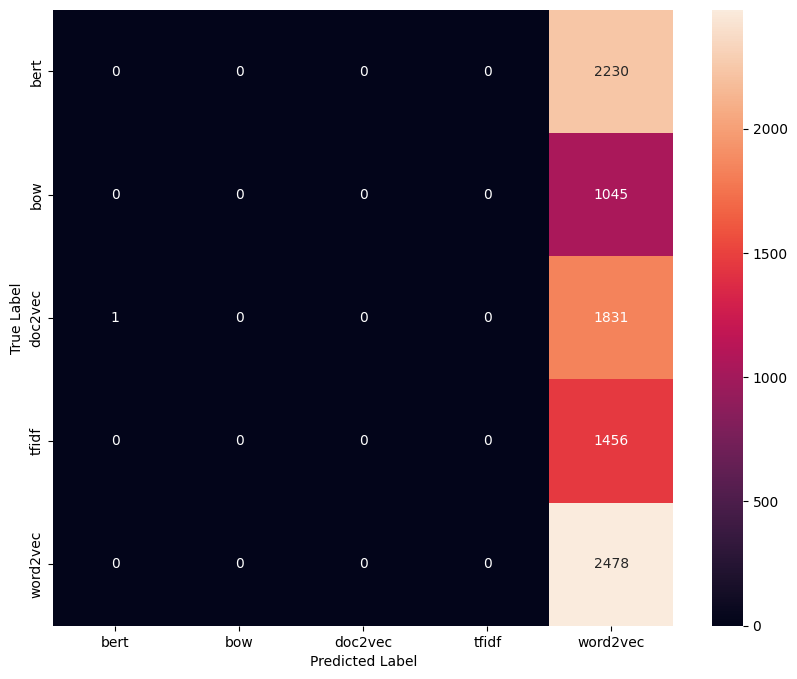

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting Confusion Matrix
def plot_cnf_mtx(y_test, y_pred, filelabel):
    confusion_mtx = tf.math.confusion_matrix(y_test, y_pred) 
    plt.figure(figsize=(10, 8))
    sns.heatmap(confusion_mtx, xticklabels = filelabel, yticklabels = filelabel, annot=True, fmt = 'g')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()
from sklearn.metrics import accuracy_score
display("Accuracy: "+ str(accuracy_score(y_test,y_pred)))

labels = ['bert', 'bow', 'doc2vec', 'tfidf', 'word2vec']
plot_cnf_mtx(y_test, y_pred, labels)